### Replacing with missing value

In [95]:
## library importing
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [96]:
## load the dataset
import pandas as pd
df = pd.read_csv('C:/Users/HP/Documents/diabetes.csv')

### Explore the dataset


In [97]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
## showing the number of rows and columns
df.shape

(768, 9)

In [99]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Check the dataset for missing values


In [100]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Display Descriptive Statistics

In [101]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Identify columns with missing values and find out their frequency? 


In [102]:
## since 0 has been identified as the missing values
missing_col_value = (df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]==0).sum()
print(missing_col_value)

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


###  Identify the number of positive and negative patients based on target (dependent) variable, outcome? Plot the frequencies 
using a bar chart?

where:

1 represents a positive outcome (diabetic).
0 represents a negative outcome (non-diabetic).

In [103]:
# replacing 0 and 1 as Negative and Positive respectively
df["df_outcome"] = df["Outcome"].replace({1: "Positive", 0: "Negative"})

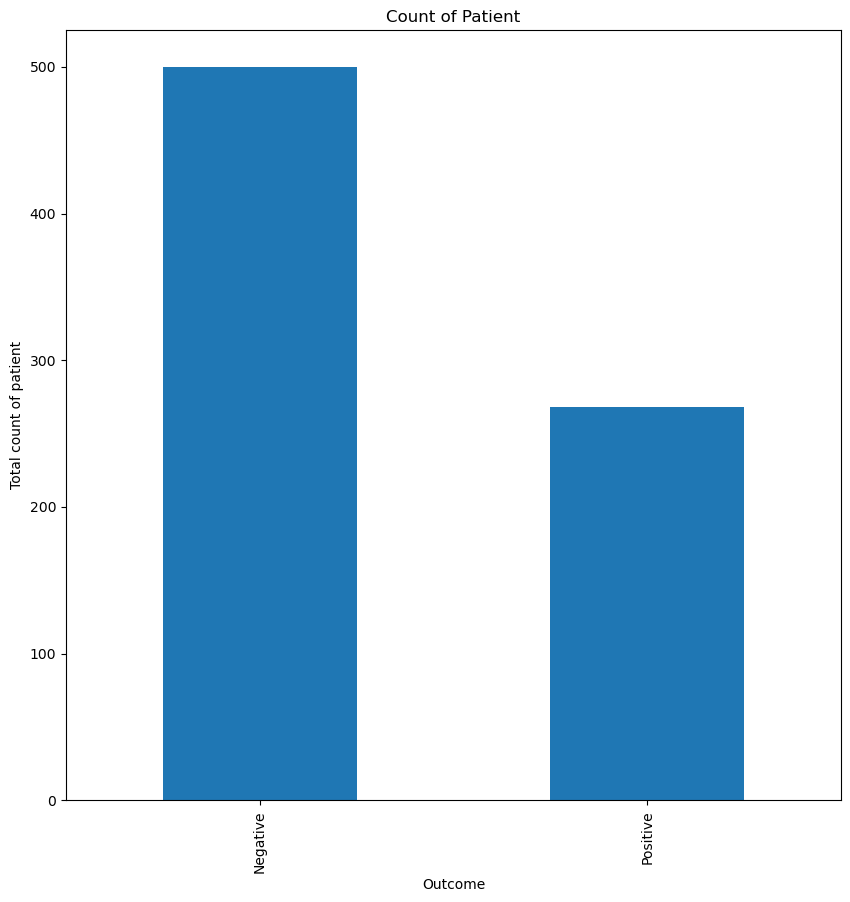

In [104]:
plt.figure(figsize= (10,10))
df["df_outcome"].value_counts().plot(kind = 'bar')
plt.xlabel('Outcome')
plt.ylabel('Total count of patient')
plt.title('Count of Patient')
plt.show()

### Identify relationships between variables using correlation_matrix

In [107]:
correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,df_outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,1.000000
df_outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,1.000000


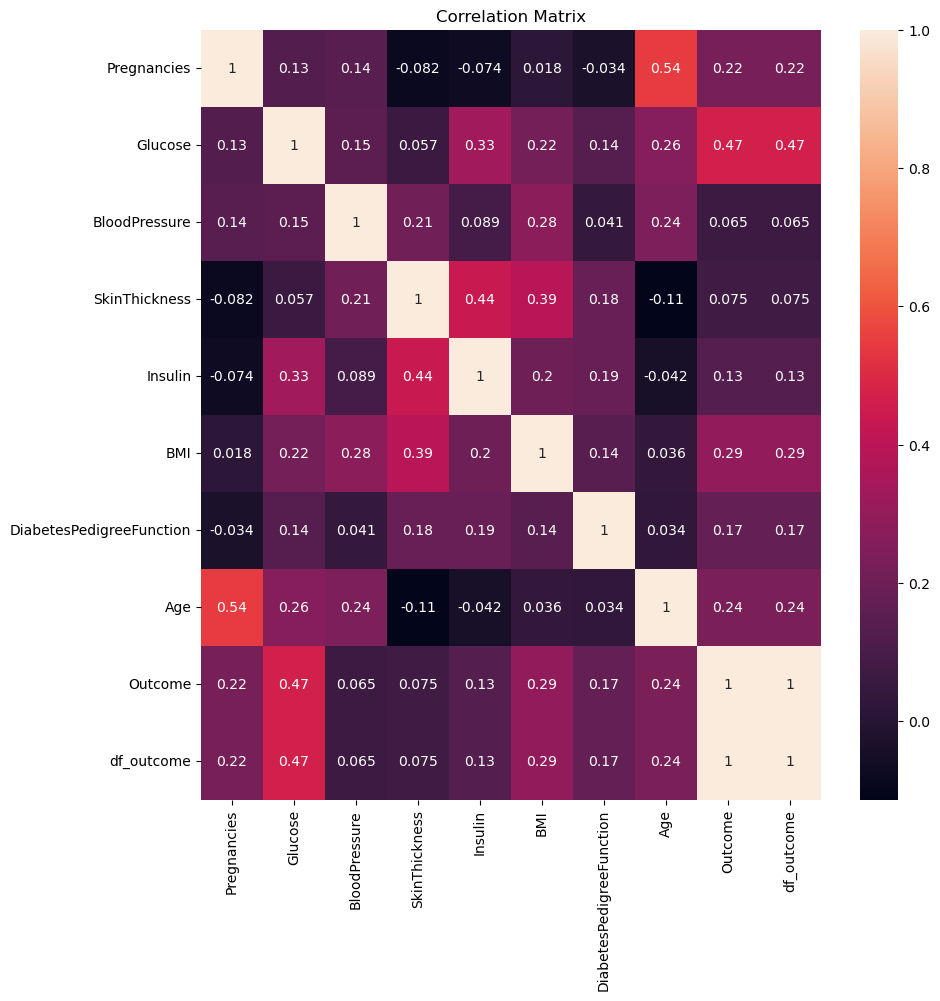

In [108]:
## heatmap plot
plt.figure(figsize = (10,10))

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.show()


In [109]:
## replacing where zero values to nan 
df['Glucose'].replace(0, np.nan, inplace = True)
df['BloodPressure'].replace(0, np.nan, inplace = True)
df['SkinThickness'].replace(0, np.nan, inplace = True)
df['Insulin'].replace(0, np.nan, inplace = True)
df['BMI'].replace(0, np.nan, inplace = True)
df['DiabetesPedigreeFunction'].replace(0, np.nan, inplace = True)
df['Age'].replace(0, np.nan, inplace = True)

In [110]:

# checking the columns to see if there are still zero values
(df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                     "BMI", "DiabetesPedigreeFunction", "Age"]]==0).sum()


Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [111]:
### Check out the missing values counts per variable
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
df_outcome                    0
dtype: int64

In [112]:
## Identify the mean value for each variable 
df.mean()


Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
df_outcome                    0.348958
dtype: float64

### Fill the missing values with mean column values 
 Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [113]:
##filling the nan values with nan
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

### Display descriptive statistics and checkout the min values of the aforementioned columns once again? Any ZEROS ? 

In [114]:
## there are no 0 in the aforementioned columns anymore
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,df_outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


### check out the missing values counts per variable,once again

In [115]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
df_outcome                  0
dtype: int64

### Plot data distribution of each variable

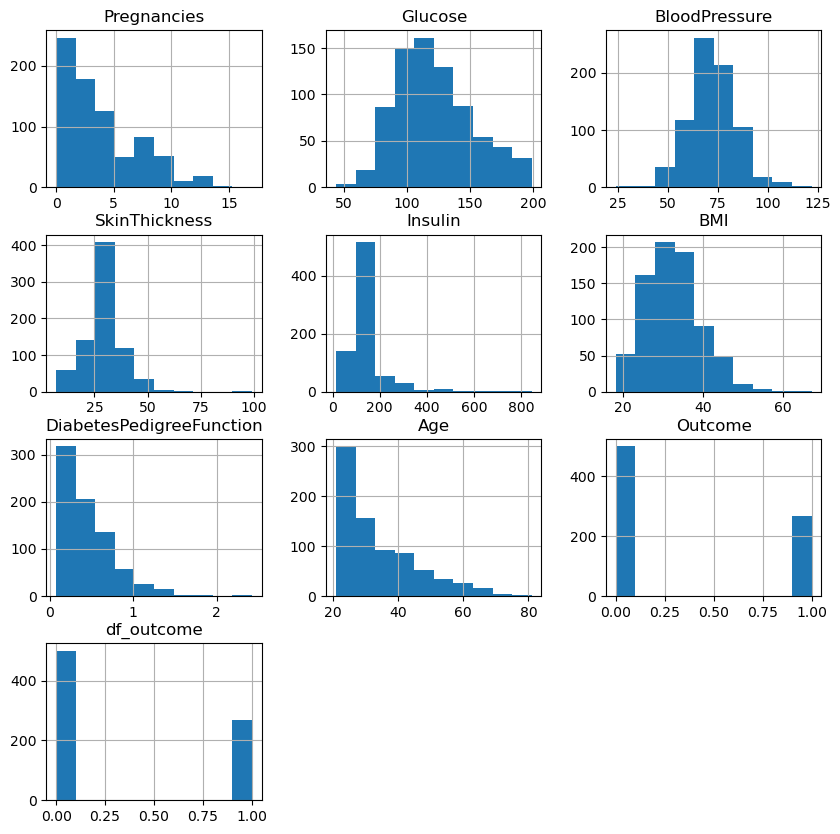

In [116]:
df.hist(bins= 10, figsize=(10,10))
plt.show()

### Plot the Boxplot for each variable? interpret the diagrams 


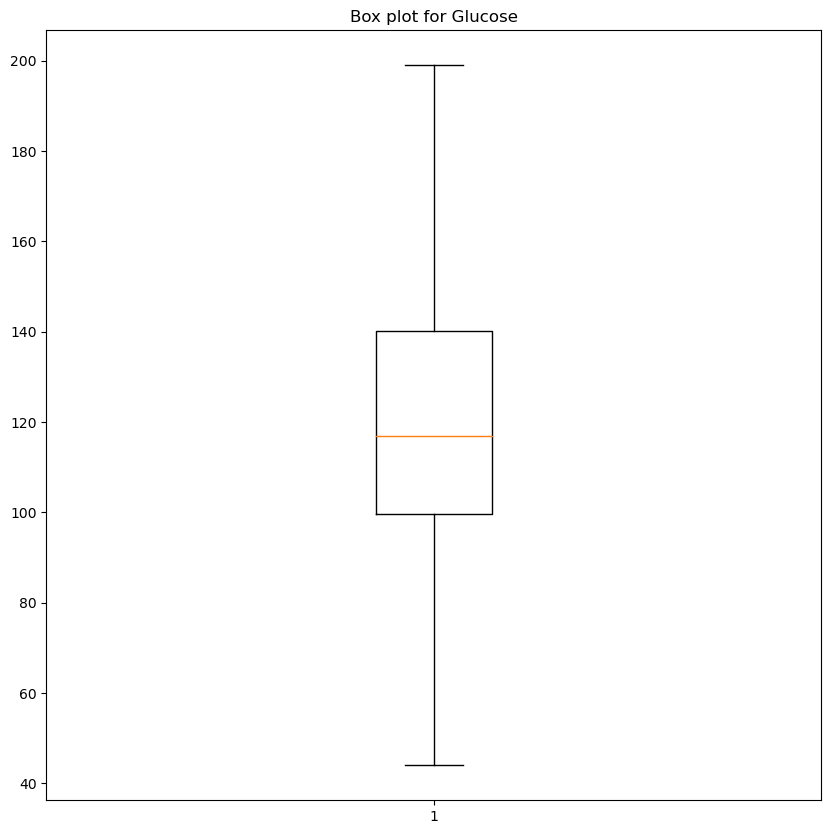

In [117]:
#this distribution is not skewed
fig = plt.figure(figsize = (10, 10))
data = df['Glucose']
plt.boxplot(data)
plt.title('Box plot for Glucose')
plt.show()

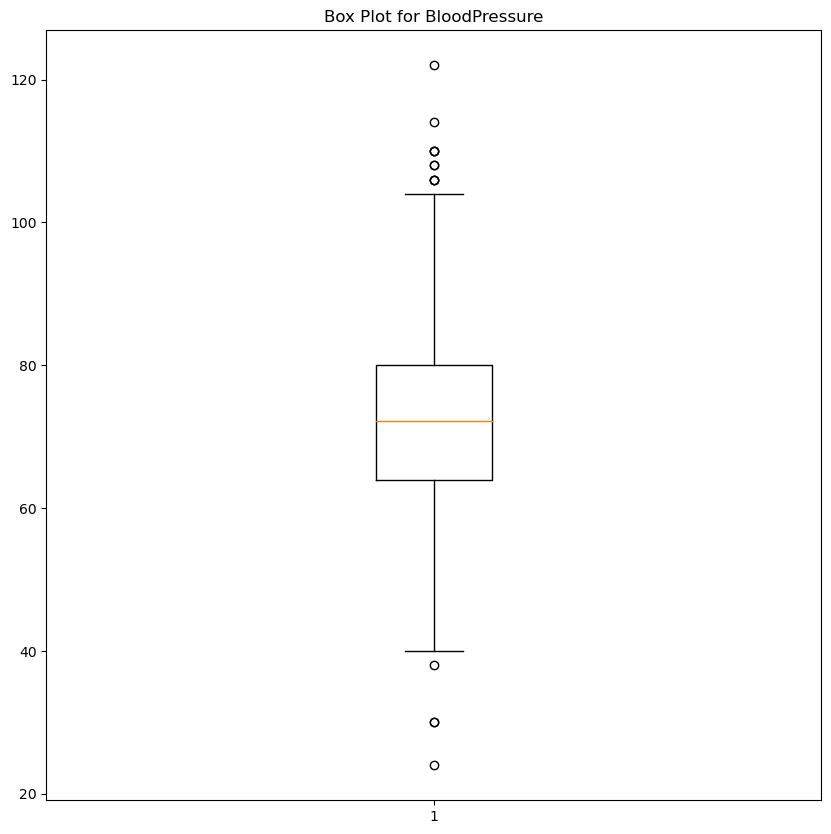

In [119]:
#the distribution is not skewed
fig = plt.figure(figsize = (10, 10))
data = df['BloodPressure']
plt.boxplot(data)
plt.title('Box Plot for BloodPressure')

plt.show()

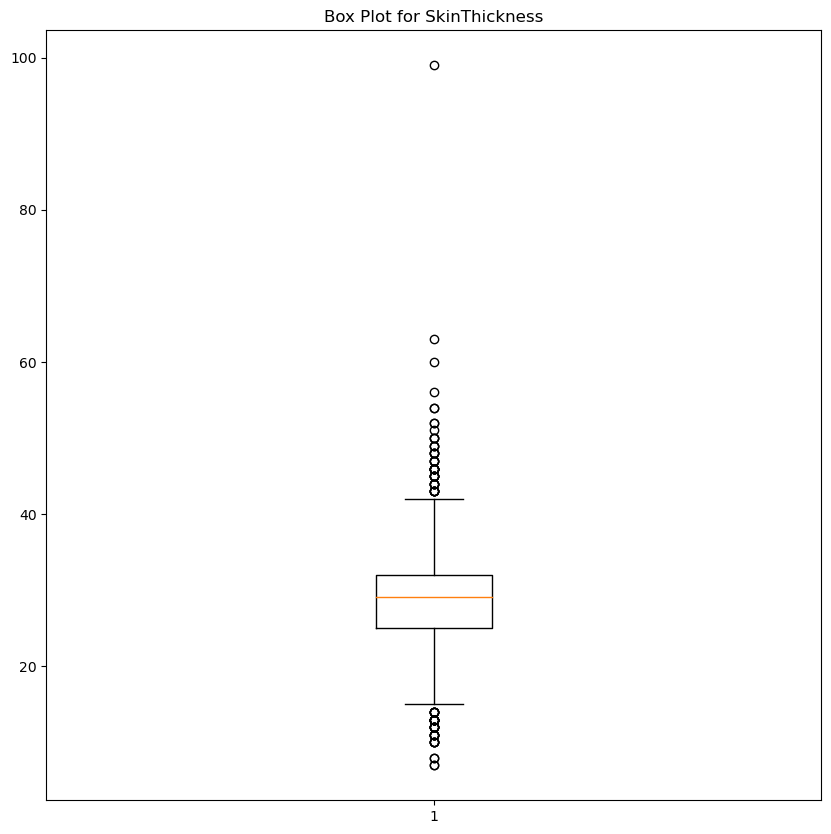

In [120]:
# the distribution is negatively skewed because it is closer to the top
fig = plt.figure(figsize = (10, 10))
data = df['SkinThickness']
plt.boxplot(data)
plt.title('Box Plot for SkinThickness')
plt.show()

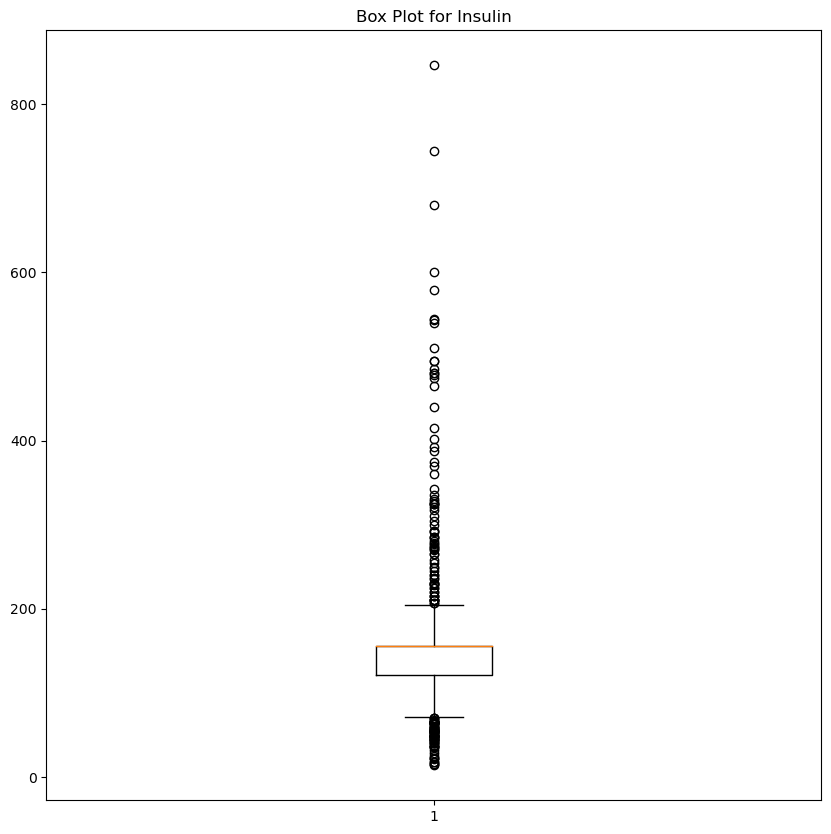

In [121]:
## the distribution is skewed and it contains lots of outliers
fig = plt.figure(figsize = (10, 10))
data = df['Insulin']
plt.boxplot(data)
plt.title('Box Plot for Insulin')
plt.show()

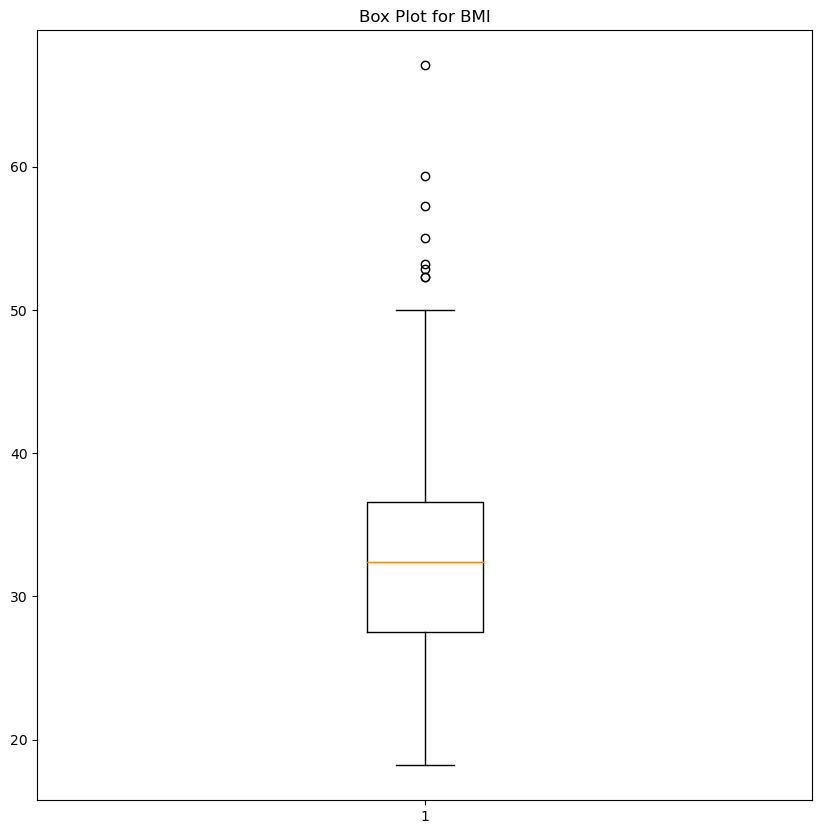

In [122]:
# the destibution is  not skewed
fig = plt.figure(figsize = (10, 10))
data = df['BMI']
plt.boxplot(data)
plt.title('Box Plot for BMI')
plt.show()

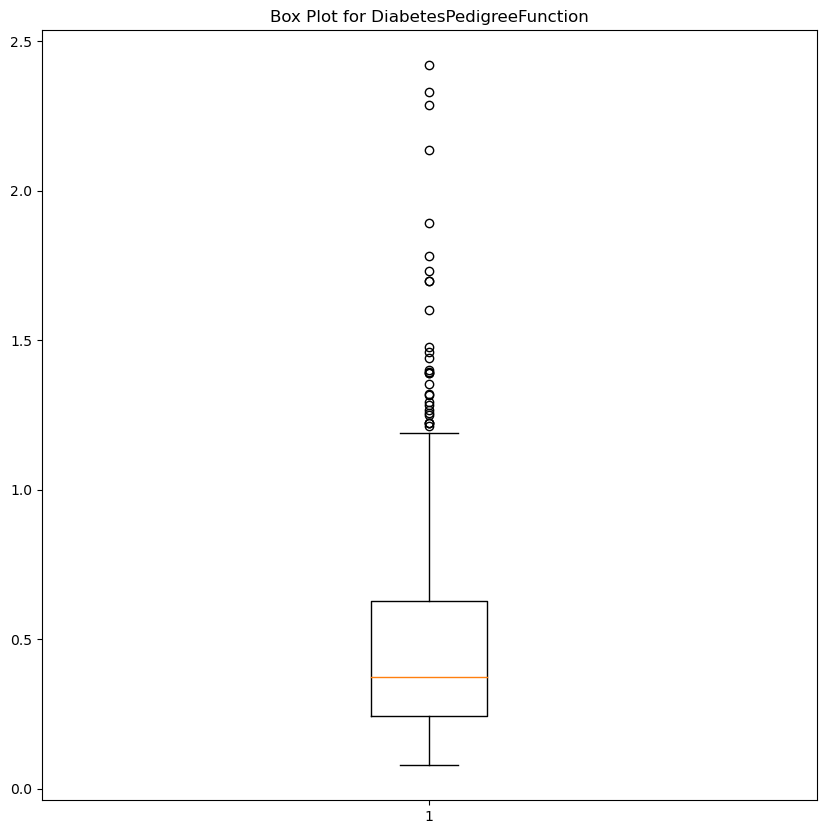

In [123]:
#this distribution is positively skewed because the median is closer to the bottom and there are outliers present
fig = plt.figure(figsize = (10, 10))
data = df['DiabetesPedigreeFunction']
plt.boxplot(data)
plt.title('Box Plot for DiabetesPedigreeFunction')

plt.show()


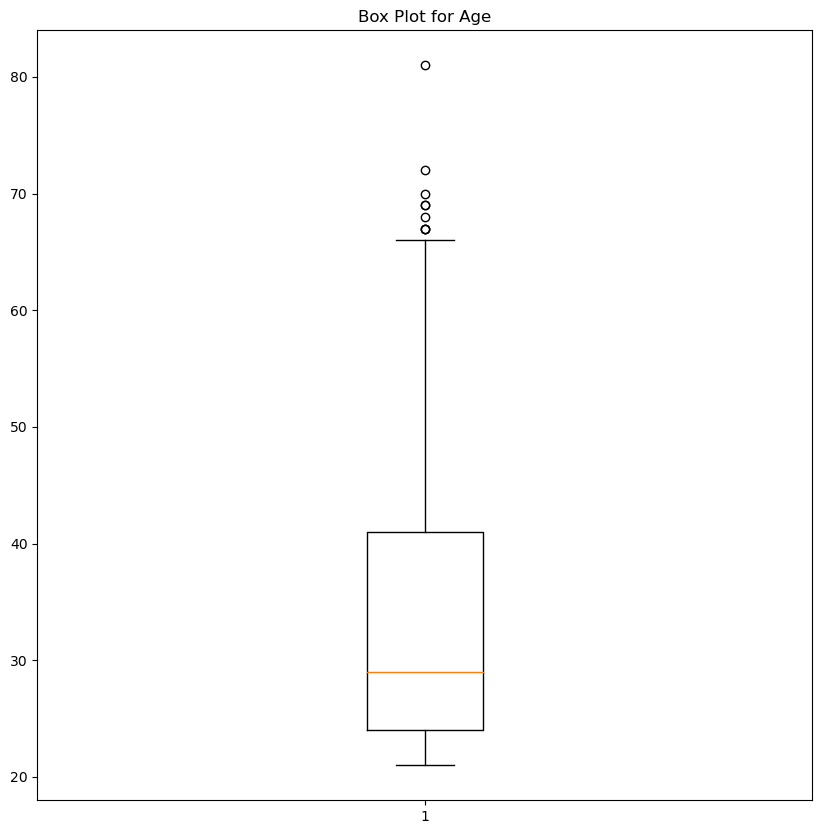

In [124]:
#the distribution is positively skewed, because the median is closer to the bottom
fig = plt.figure(figsize = (10, 10))
data = df['Age']
plt.boxplot(data)
plt.title('Box Plot for Age')
plt.show()


### Plot demographic and distribution of diabetics/nondiabetics across age variable?

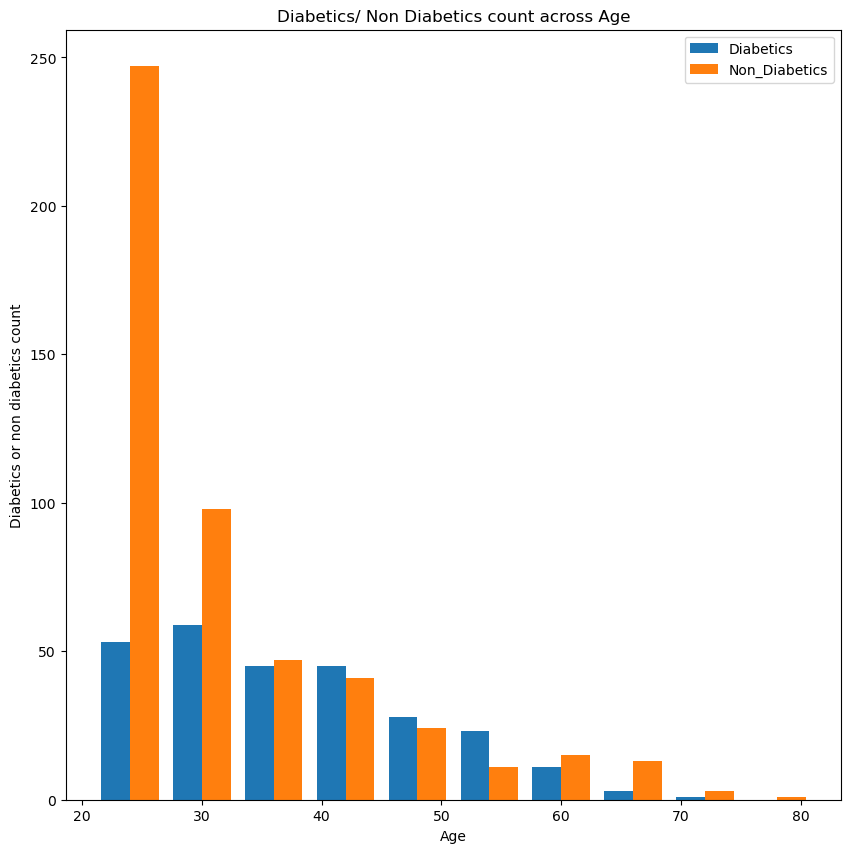

In [125]:
## patient with diabetics
pos_out = df[df['Outcome']== 1]

## getting ages of patient with diabetics
pos_out_age = pos_out['Age']





## patient without diabetics
neg_out = df[df['Outcome']== 0]

## getting ages of patient without diabetics
neg_out_age = neg_out['Age']



## plotting the histogram
fig = plt.figure(figsize = (10, 10))
plt.xlabel('Age')
plt.ylabel('Diabetics or non diabetics count')
plt.title('Diabetics/ Non Diabetics count across Age')
plt.hist([pos_out_age, neg_out_age], label = ['Diabetics', 'Non_Diabetics'])
plt.legend()
plt.show()

### Investigate how the number of pregnancies impacts diabetes? Demonstrate the relationship with a plot. 

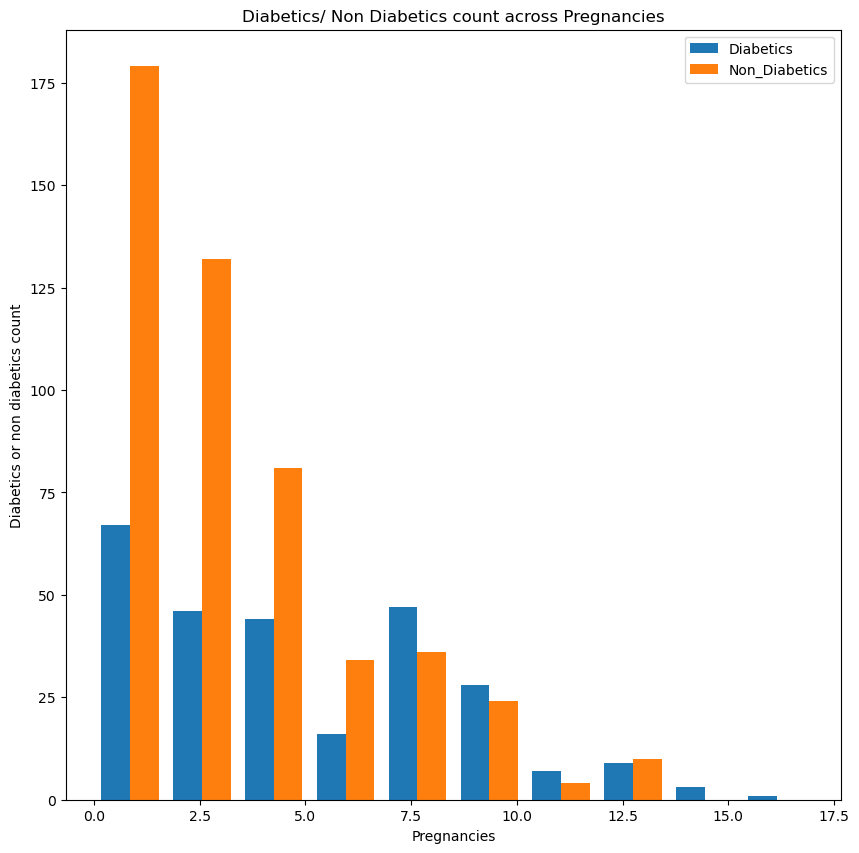

In [127]:
## patient with diabetics
pos_out = df[df['Outcome']== 1]

## getting ages of patient with diabetics
pos_out_preg = pos_out['Pregnancies']





## patient without diabetics
neg_out = df[df['Outcome']== 0]

## getting ages of patient without diabetics
neg_out_preg = neg_out['Pregnancies']



## plotting the histogram
fig = plt.figure(figsize = (10, 10))
plt.xlabel('Pregnancies')
plt.ylabel('Diabetics or non diabetics count')
plt.title('Diabetics/ Non Diabetics count across Pregnancies')
plt.hist([pos_out_preg, neg_out_preg], label = ['Diabetics', 'Non_Diabetics'])
plt.legend()
plt.show()

### Check if there are any outliers in our dataset. Any data point outside 25% and 75% quarters can be considered an outlier. Remove the outliers from the dataset. 

In [128]:
##removing the outliers in Pregnancies column
max_threshod, min_threshod = df["Pregnancies"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
df_2 = df[(df.Pregnancies > min_threshod) & (df.Pregnancies < max_threshod)]


6.0 1.0


In [129]:
##removing the outliers in Glucose column
max_threshod, min_threshod = df["Glucose"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
df_2 = df[(df.Glucose > min_threshod) & (df.Glucose < max_threshod)]

140.25 99.75


In [130]:
##removing the outliers in BloodPressure column
max_threshod, min_threshod = df["BloodPressure"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
df_2 = df[(df.BloodPressure > min_threshod) & (df.BloodPressure < max_threshod)]

80.0 64.0


In [131]:
##removing the outliers in SkinThickness column
max_threshod, min_threshod = df["SkinThickness"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
df_2 = df[(df.SkinThickness > min_threshod) & (df.SkinThickness < max_threshod)]

32.0 25.0


In [132]:
##removing the outliers in Insulin column
max_threshod, min_threshod = df["Insulin"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
df_2 = df[(df.Insulin > min_threshod) & (df.Insulin < max_threshod)]

155.5482233502538 121.5


In [133]:
##removing the outliers in BMI column
max_threshod, min_threshod = df["BMI"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
df_2 = df[(df.BMI > min_threshod) & (df.BMI < max_threshod)]

36.6 27.5


In [134]:
##removing the outliers in Diabetes Pedigree Function column
max_threshod, min_threshod = df["DiabetesPedigreeFunction"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
df_2 = df[(df.DiabetesPedigreeFunction > min_threshod) & (df.DiabetesPedigreeFunction < max_threshod)]

0.62625 0.24375


In [135]:
##removing the outliers in Age column
max_threshod, min_threshod = df["Age"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
df_2 = df[(df.Age > min_threshod) & (df.Age < max_threshod)]

41.0 24.0


In [136]:
## much of the data has been dropped 
df_2.shape

(355, 10)

### Create a new categorical variable based on BMI using the following criteria. Name the new variable “BMI_tier” and add it to  dataset as a new column. 

- BMI = 0  then “NA”
- 0 < BMI < 18.5 then “Under Weight”
- 18.5 <= BMI < 25 then “Normal”
- 25 <= BMI < 30 then “Overweight” 
- 30 <= BMI then “Obese”


In [138]:
## defining a function to create a new column BMI_tier
def BMI(tier):
    if tier == 0:
        return 'NA'
    elif 0 < tier < 18.5:
        return 'Under Weight'
    elif 18.5 <= tier < 25:
        return 'Normal'
    elif 25 <= tier < 30:
        return 'Overweight'
    elif 30 <= tier:
        return 'Obese'

In [139]:
## applying the function
df_2['BMI_tier'] = df_2['BMI'].apply(BMI)

C:\Users\HP\AppData\Local\Temp\ipykernel_5884\1106851761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['BMI_tier'] = df_2['BMI'].apply(BMI)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


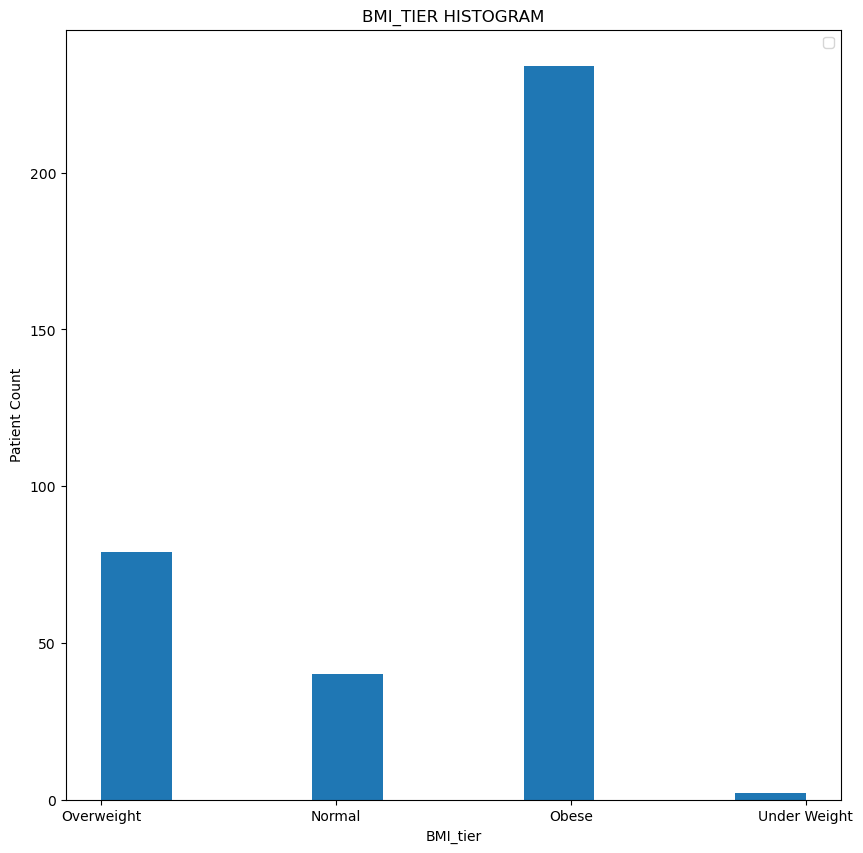

In [140]:
## Plot the BML_tier histogram
fig, ax = plt.subplots(figsize= (10,10))
ax.hist(df_2['BMI_tier'])
plt.ylabel('Patient Count')
plt.xlabel('BMI_tier')
plt.title('BMI_TIER HISTOGRAM')
plt.legend()
plt.show()

In [141]:
## How many obese individuals exist in the dataset?
## Making use of piechart to illustrate the proportion of each BMI tier
value = df_2['BMI_tier'].value_counts()
value
## 234 obese individuals exist in our dataset

BMI_tier
Obese           234
Overweight       79
Normal           40
Under Weight      2
Name: count, dtype: int64

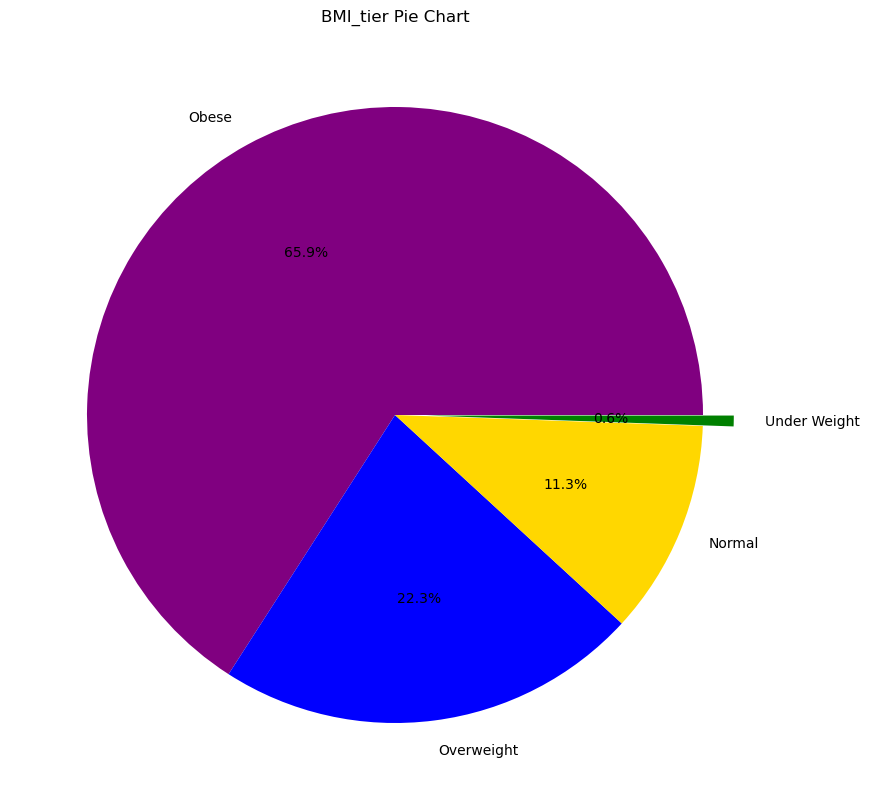

In [142]:
fig, ax = plt.subplots(figsize=(10, 10))
labels=["Obese", "Overweight", "Normal", "Under Weight"]
ax.pie(value, labels=labels, explode =[0, 0, 0, 0.1], colors = ["purple", "blue", "gold", "green"], autopct='%.1f%%')
ax.set_title('BMI_tier Pie Chart')
plt.show()

###  Create a new categorical variable based on Oral Glucose Tolerance Test (Glucose) using the following criteria, suggested by DIABETES UK. Name the new variable “OGTT_tier” and add it to our dataset as a new column. 

- Glucose == 0 then “NA”
- Glucose < 140 then “Normal”
- 140 <= Glucose < 198 then “Impaired Glucose Tolerance”
- 198 <= Glucose then “Diabetic Level”


In [143]:
## definin a function for OGTT_tier
def Oral_Glucose_Tolerance(Glucose):
    if Glucose == 0:
        return 'NA'
    elif Glucose < 140:
        return 'Normal'
    elif 140 <= Glucose < 198:
        return 'Impaired Glucose Tolerance'
    elif 198 <= Glucose:
        return 'Diabetic Level'
    

In [144]:
## applying the function created
df_2['OGTT_tier'] = df_2['Glucose'].apply(Oral_Glucose_Tolerance)
df_2

C:\Users\HP\AppData\Local\Temp\ipykernel_5884\1420404453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['OGTT_tier'] = df_2['Glucose'].apply(Oral_Glucose_Tolerance)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,df_outcome,BMI_tier,OGTT_tier
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,0,Overweight,Normal
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,1,Normal,Impaired Glucose Tolerance
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,1,Obese,Normal
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0,0,Overweight,Normal
6,3,78.0,50.0,32.00000,88.000000,31.0,0.248,26,1,1,Obese,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
756,7,137.0,90.0,41.00000,155.548223,32.0,0.391,39,0,0,Obese,Normal
758,1,106.0,76.0,29.15342,155.548223,37.5,0.197,26,0,0,Obese,Normal
762,9,89.0,62.0,29.15342,155.548223,22.5,0.142,33,0,0,Normal,Normal
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,0,Obese,Normal


In [145]:
## 1 individual are categorized as Diabetic Level in our newly created variable
df_2['OGTT_tier'].value_counts()

OGTT_tier
Normal                        266
Impaired Glucose Tolerance     88
Diabetic Level                  1
Name: count, dtype: int64

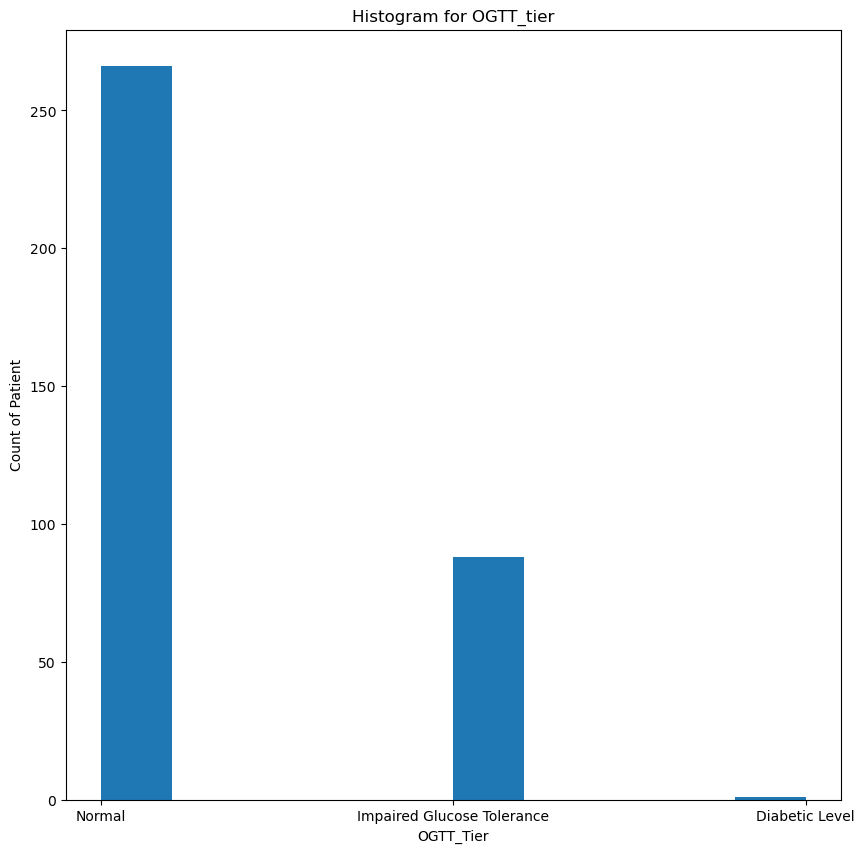

In [146]:
## OGTT_tier Histogram
plt.figure(figsize= (10,10))
plt.hist(df_2['OGTT_tier'])
plt.xlabel('OGTT_Tier')
plt.ylabel('Count of Patient')
plt.title('Histogram for OGTT_tier')
plt.show()